## Problem Statement
In this project, we have to develop a neural network which can read handwritten digits and classify them accordingly. The dataset is taken from MNIST. Now let's start building our convolution neural network. 

## Load data

In [1]:
from keras.datasets import mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [2]:
# Viewing shapes of splitted data
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


We are taking 60,000 handwritten digit images for training and 10,000 for testing.

## Data visualization

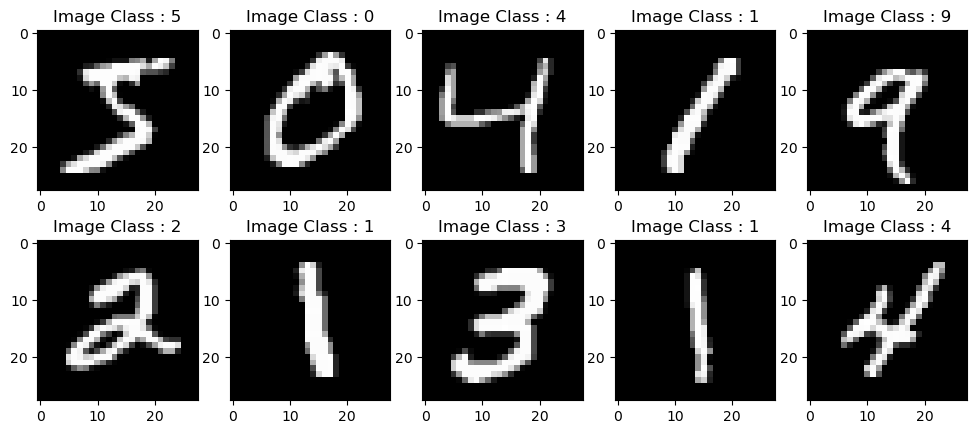

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Image Class : {ytrain[i]}')
plt.show()

All the handwritten digits seem correctly classified.

## Data preprocessing

In [4]:
# Scaling the data
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

This will convert x variable in 0 to 1 range.

In [5]:
# Encode the target variable
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [6]:
# Encoded first 5 terms
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
# Original first 5 terms
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Building CNN

In [8]:
# Importing necessary modules
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

In [9]:
# initialize neural network with Sequential model
nn = Sequential()

# Convolution Layer 1
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

# Convolution Layer 2
nn.add(Convolution2D(filters=16, kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

# Flatten Layer
nn.add(Flatten())

# Hidden Dense Layers
nn.add(Dense(128,activation='relu'))
nn.add(Dense(128,activation='relu'))

# Output Layer
nn.add(Dense(10, activation='softmax'))

In [10]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0

We have built our convolution neural network.

In [11]:
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [12]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Start training the neural network
hist = nn.fit(xtrain_scaled, ytrain_cat, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
1500/1500 [==============================] - 39s 23ms/step - loss: 0.1684 - accuracy: 0.9469 - val_loss: 0.0999 - val_accuracy: 0.9707
Epoch 2/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0662 - accuracy: 0.9784 - val_loss: 0.0606 - val_accuracy: 0.9816
Epoch 3/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0526 - val_accuracy: 0.9859
Epoch 4/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0582 - val_accuracy: 0.9831
Epoch 5/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 6/100
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0525 - val_accuracy: 0.9874
Epoch 7/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0

In [14]:
# Prediction
ypred_test = nn.predict(xtest_scaled)

313/313 [==============================] - 3s 8ms/step


In [15]:
ypred_test[0:5]

array([[8.59456591e-16, 3.59855028e-11, 3.93557080e-08, 1.54184736e-08,
        6.21584805e-16, 7.15824372e-13, 5.70508661e-18, 1.00000000e+00,
        3.54080931e-10, 1.29838229e-09],
       [1.42277981e-13, 4.09280154e-14, 1.00000000e+00, 3.34646581e-15,
        5.27488032e-23, 4.84281331e-22, 3.51465268e-19, 2.18474768e-14,
        6.26791874e-17, 1.11230460e-22],
       [1.90467697e-10, 9.99999881e-01, 1.07332401e-08, 5.66287954e-11,
        5.71260328e-09, 1.06869247e-09, 5.79092677e-11, 1.77672220e-07,
        3.40093242e-09, 4.41902728e-08],
       [9.99999762e-01, 8.89219032e-10, 1.60517118e-07, 1.45998269e-09,
        6.71052947e-09, 2.63234989e-10, 5.65719809e-08, 4.08989287e-09,
        1.65614189e-09, 1.41133665e-08],
       [1.22156374e-11, 4.72087300e-11, 1.45531449e-12, 1.61622506e-13,
        9.99999285e-01, 3.12354072e-14, 4.29596948e-11, 4.28501991e-11,
        1.42636415e-11, 7.47049341e-07]], dtype=float32)

These are probabilities. We need to convert them into predictions.

In [16]:
# Convert probabalities into predictions
ypred_classes = []

for i in range(ypred_test.shape[0]):
    ypred_classes.append(ypred_test[i].argmax())
    
# Viewing first 5 terms
    ypred_classes[0:5]

In [17]:
# Evaluation using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(ytest, ypred_classes)*100, '%')
print('-----------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred_classes))
print('-----------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred_classes))

Accuracy:  98.77 %
-----------------------------------------------
Confusion matrix: 
 [[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1132    0    0    0    0    1    2    0    0]
 [   0    5 1023    0    1    0    1    2    0    0]
 [   0    0    1 1001    0    3    0    1    4    0]
 [   0    0    1    0  959    0    3    2    0   17]
 [   4    0    0    9    0  875    2    1    0    1]
 [   7    2    1    0    1    1  945    0    1    0]
 [   1    1    7    2    0    0    0 1015    0    2]
 [   1    0    0    1    3    0    1    1  961    6]
 [   2    2    1    4    1    6    0    3    1  989]]
-----------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98     

### This neural network has 98% accuracy and it is ready to be used for handwritten digit prediction.